# ОЧИСТКА ДАННЫХ

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [137]:
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


## Метод Тьюки

In [138]:
# Введите свое решение ниже
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned




In [139]:
sber_data = pd.read_csv('data/sber_data.csv')
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30412


## МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

In [140]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [141]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


## Задание 2.1

Чему равно число строк в таблице?

In [142]:
display(sber_data.shape[0])

30471

## Задание 2.2
Сколько районов Москвы и Московской области представлено в данных?


In [143]:
display(sber_data['sub_area'].nunique())

146

## Задание 2.3
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

In [144]:
display(sber_data['price_doc'].max())

111111112

Задание 2.4
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

,price_doc,ecology
0,5850000,good
1,6000000,excellent
2,5700000,poor
3,13100000,good
4,16331452,excellent


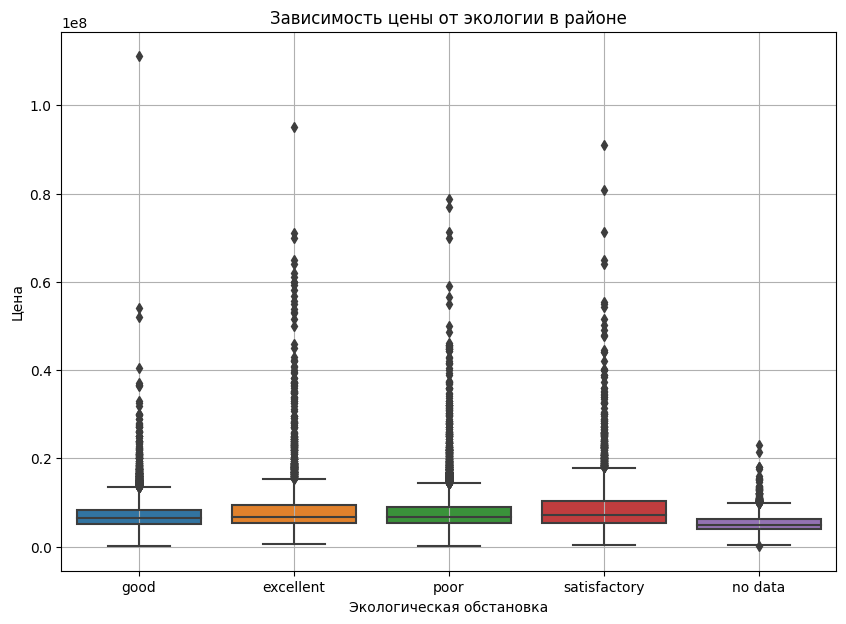

In [145]:
box_data = sber_data[['price_doc', 'ecology']]
display(box_data.head())
fig = plt.figure(figsize=(10, 7))
fig = sns.boxplot(
    data=box_data,
    x='ecology',
    y='price_doc'
)
fig.set_title('Зависимость цены от экологии в районе');
fig.set_xlabel('Экологическая обстановка');
fig.set_ylabel('Цена');
fig.grid()

## Задание 2.5
Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.


A С увеличением расстояния от центра города цена растёт.
B Большинство наблюдений находятся на расстоянии до 40 км от центра Москвы.
C С увеличением расстояния от центра города цена падает.
D Большинство наблюдений находятся на расстоянии более 40 км от центра Москвы.

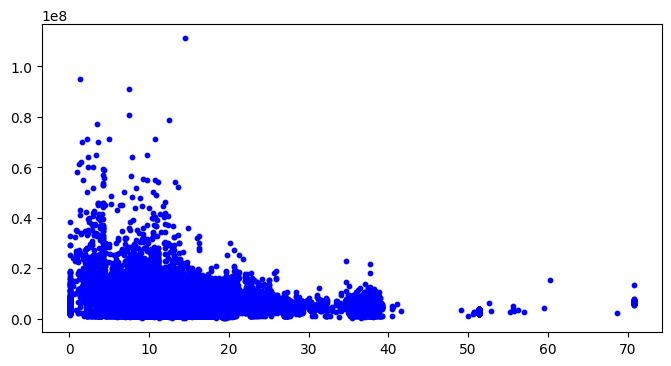

In [146]:
scatter_data = sber_data[['price_doc', 'kremlin_km']]
fig = plt.figure(figsize=(8, 4))
fig = plt.scatter(
    x=scatter_data['kremlin_km'],
    y=scatter_data['price_doc'],
    s=10,
    marker='o',
    c='Blue'    
);


## Задание 6.5

Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:


A Число наблюдений, не попавших в интервал слева, меньше чем справа.
B Интервал метода 3ех сигм полностью охватывает все наблюдений.
C Число наблюдений, не попавших в интервал слева, больше чем справа.

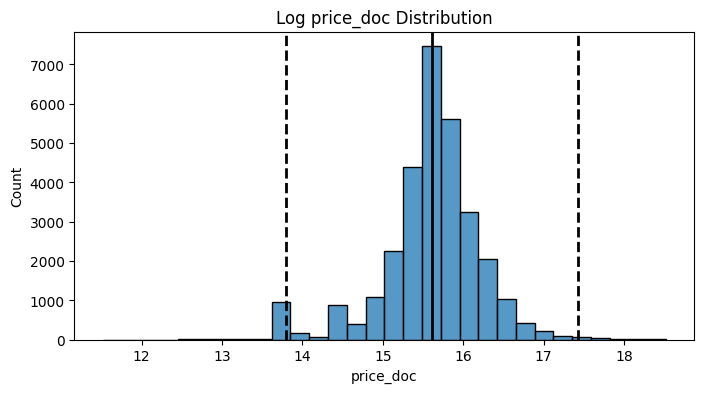

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price_doc Distribution');

## Задание 6.6

Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

In [148]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


Задание 6.7

Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [149]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 92
Результирующее число записей: 30379


## ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ ДУБЛИКАТОВ

In [150]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


In [151]:
# Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


## ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ НЕИНФОРМАТИВНЫХ ПРИЗНАКОВ

Чтобы считать признак неинформативным, прежде всего нужно задать какой-то определённый порог. Например, часто используют пороги в 0.95 и 0.99. Это означает: признак неинформативен, если в нем 95 % (99 %) одинаковых значений или же 95 % (99 %) данных полностью уникальны.

К сожалению, в pandas пока нет волшебной палочки, которая мгновенно бы выдавала список столбцов, обладающих низкой информативностью. Однако процедура их поиска легко реализуется вручную.

Разберём алгоритм:

→ Создаём пустой список low_information_cols, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.

→ В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:

рассчитаем top_freq — наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True. Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
Например, для столбца oil_chemistry_raion (нефтехимический район) результат будет следующим:



Отсюда нам нужен максимум.

рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count(). Например, для столбца id число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.
сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.

In [152]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


In [153]:
# Итак, мы нашли шесть неинформативных признаков. Теперь можно удалить их с помощью метода drop(), передав результирующий список в его аргументы.
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


# 8. Закрепление знаний

In [154]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела.

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

<Axes: title={'center': 'Количество заболеваний в зависимости от количества беременностей'}, xlabel='Pregnancies'>

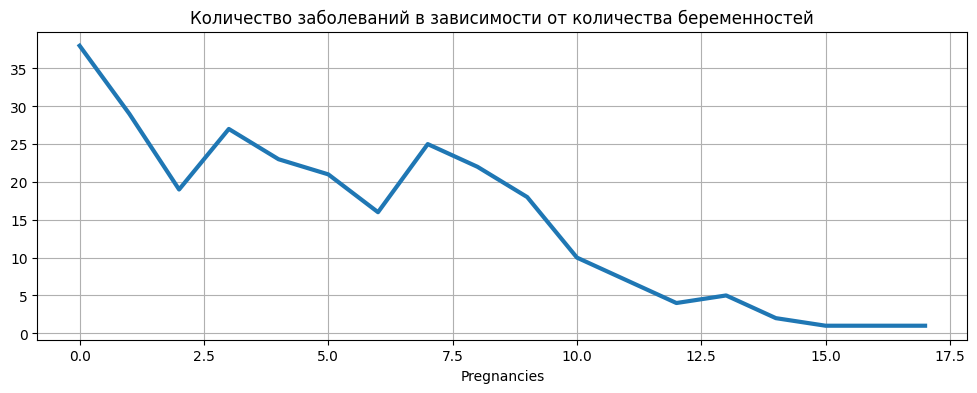

In [155]:
# Предварительный анализ по каждому признаку
grouped_cases = diabetes.groupby('Pregnancies')['Outcome'].sum()
grouped_cases.plot(
    kind = 'line',
    figsize = (12 ,4),
    title = 'Количество заболеваний в зависимости от количества беременностей',
    grid = True,
    lw = 3
)

## Задание 8.1

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [156]:
dpl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dpl_columns)
diab_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diab_duplicates.shape[0]}')

# Создадим новую таблицу diab_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.
diab_dedupped = diabetes.drop_duplicates(subset=dpl_columns)
print(f'Результирующее число записей: {diab_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


In [157]:
print(round(diabetes['SkinThickness'].mean(), 2))
print(round(diabetes['SkinThickness'].median(), 2))

20.46
23.0


## Задание 8.2

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [158]:
#список неинформативных признаков
low_inform_cols = [] 

#цикл по всем столбцам
for col in diab_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diab_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diab_dedupped[col].nunique() / diab_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_inform_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_inform_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

# Drop non-imformative attributes

print(f'Исходное число признаков: {diab_dedupped.shape[1]}') 
informative_diabetes = diab_dedupped.drop(low_inform_cols, axis=1)
print(f'Результирующее число признаков: {informative_diabetes.shape[1]}') 

Gender: 100.0% одинаковых значений
Исходное число признаков: 10
Результирующее число признаков: 9


In [159]:
print(round(diab_dedupped['SkinThickness'].mean(), 2))
print(round(diab_dedupped['SkinThickness'].median(), 2))

20.54
23.0


## Задание 8.3

Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [160]:
# Check that there no NaN
display(pd.isnull(informative_diabetes).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [161]:
print(round(informative_diabetes['SkinThickness'].mean(), 2))
print(round(informative_diabetes['SkinThickness'].median(), 2))

20.54
23.0


In [162]:
repl_inf_diabetes = informative_diabetes
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    repl_inf_diabetes[col] = repl_inf_diabetes[col].replace(0, np.nan)
display(pd.isnull(repl_inf_diabetes).sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [163]:
repl_inf_diabetes = informative_diabetes
repl_inf_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = repl_inf_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
display(pd.isnull(repl_inf_diabetes).sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [164]:
# Определяем долю пропусков в поле Insuline
print(round(pd.isnull(repl_inf_diabetes['Insulin']).sum()/repl_inf_diabetes.shape[0], 2))

0.49


## Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [165]:
col_for_del=[]
for col in repl_inf_diabetes.columns:
#    print(round(pd.isnull(repl_inf_diabetes[col]).sum()/repl_inf_diabetes.shape[0], 2))
    if round(pd.isnull(repl_inf_diabetes[col]).sum()/repl_inf_diabetes.shape[0], 2) > 0.3:
        col_for_del.append(col)
repl_inf_diabetes = repl_inf_diabetes.drop(col_for_del, axis=1)
print(f'Результирующее число признаков: {repl_inf_diabetes.shape[1]}') 


Результирующее число признаков: 8


## Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [166]:
print(round(repl_inf_diabetes['SkinThickness'].mean(), 2))
print(round(repl_inf_diabetes['SkinThickness'].median(), 2))
print(pd.isnull(repl_inf_diabetes['SkinThickness']).sum())

29.15
29.0
227


In [167]:
print(f'Исходное количество строк = {df.shape[0]}')
for index, row in df.iterrows():
    if (pd.isnull(row).sum())>2:
        df = df.drop(index=index, axis=0)
print(f'Итоговое количество строк = {df.shape[0]}')

Исходное количество строк = 768
Итоговое количество строк = 768


In [174]:
df = repl_inf_diabetes
#df2 = pd.DataFrame()
df2 = pd.DataFrame(columns=df.columns)
df22 = pd.DataFrame(columns=df.columns)

#display(df.head(), df2.head())


print(f'Исходное количество строк = {df.shape[0]}')
for index, row in df.iterrows():
    if (pd.isnull(row).sum())>2:
        # display(pd.DataFrame(row).T)
        df22 = df22.append(row) # метод deprecated
        df2 = pd.concat([df2, pd.DataFrame(row).T], axis=0, ignore_index=False) # Транспонирование датафрейма
        #display(df2)
        df = df.drop(index=index, axis=0)
print(f'Итоговое количество строк = {df.shape[0]}')
display(df2, df22)


Исходное количество строк = 768
Итоговое количество строк = 761


/tmp/ipykernel_4360/67554374.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df22 = df22.append(row)
/tmp/ipykernel_4360/67554374.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df22 = df22.append(row)
/tmp/ipykernel_4360/67554374.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df22 = df22.append(row)
/tmp/ipykernel_4360/67554374.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df22 = df22.append(row)
/tmp/ipykernel_4360/67554374.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df22 = df22.append(row)
/tmp/ipykernel_4360/67554

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
57,3.0,80.0,NaN,NaN,NaN,0.174,22.0,0.0
92,2.0,74.0,NaN,NaN,NaN,0.102,22.0,0.0
112,7.0,105.0,NaN,NaN,NaN,0.305,24.0,0.0
126,10.0,115.0,NaN,NaN,NaN,0.261,30.0,1.0
154,2.0,84.0,NaN,NaN,NaN,0.304,21.0,0.0
308,0.0,94.0,NaN,NaN,NaN,0.256,25.0,0.0
323,6.0,114.0,NaN,NaN,NaN,0.189,26.0,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
57,3.0,80.0,NaN,NaN,NaN,0.174,22.0,0.0
92,2.0,74.0,NaN,NaN,NaN,0.102,22.0,0.0
112,7.0,105.0,NaN,NaN,NaN,0.305,24.0,0.0
126,10.0,115.0,NaN,NaN,NaN,0.261,30.0,1.0
154,2.0,84.0,NaN,NaN,NaN,0.304,21.0,0.0
308,0.0,94.0,NaN,NaN,NaN,0.256,25.0,0.0
323,6.0,114.0,NaN,NaN,NaN,0.189,26.0,0.0


In [177]:
df1 = repl_inf_diabetes
print(f'Исходное количество строк = {df1.shape[0]}')

thresh = df1.shape[1]-2 #
print(thresh)
df1 = df1.dropna(thresh = thresh, axis=0)
print(f'Итоговое количество строк = {df1.shape[0]}')
df3 = df1

Исходное количество строк = 768
6
Итоговое количество строк = 761


In [ ]:
print(round(df1['SkinThickness'].mean(), 1))

29.2


## Задание 8.6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

SkinThickness    28.909330
BloodPressure     3.679369
Glucose           0.657030
BMI               0.525624
dtype: float64

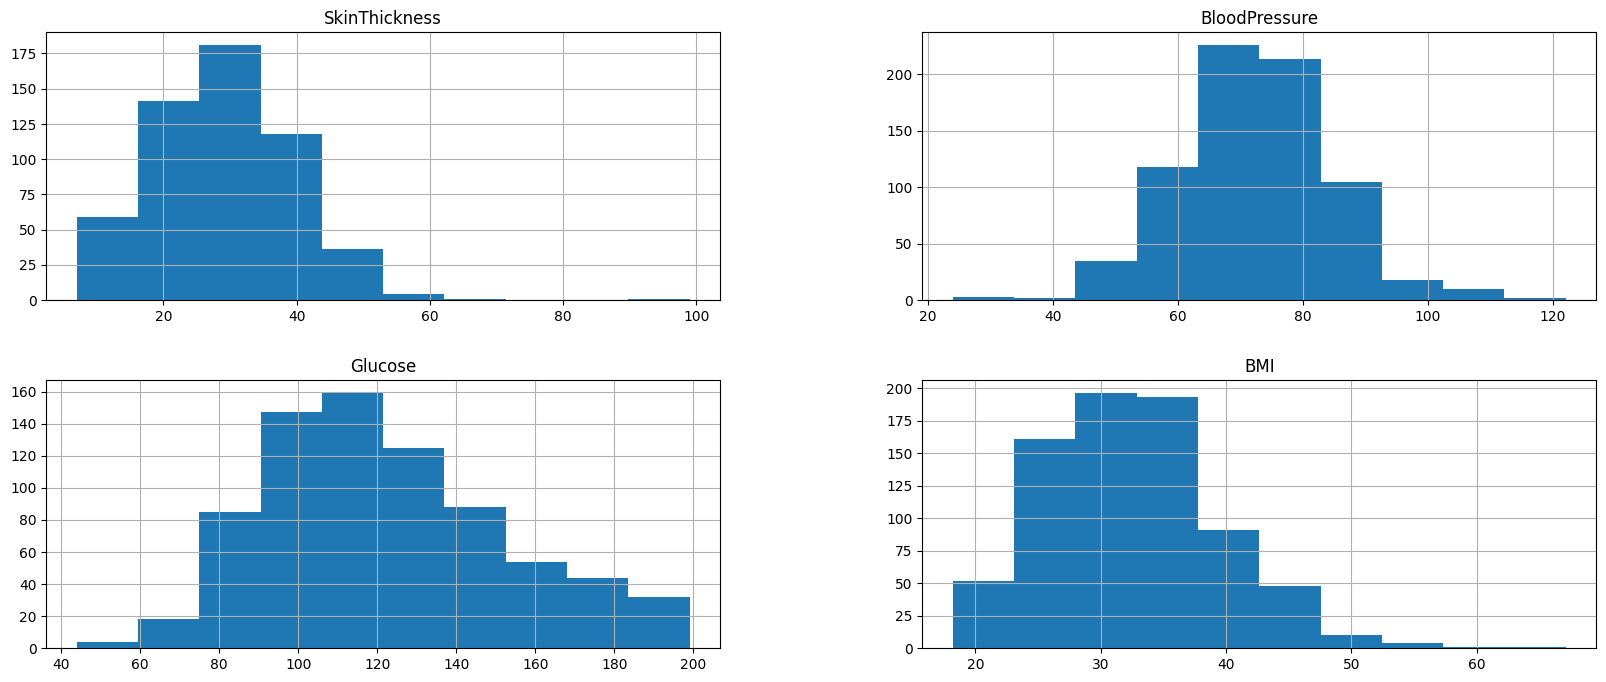

In [208]:
cols_null_percent = df1.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
cols = cols_with_null.index
df1[cols].hist(figsize=(20, 8));

In [ ]:
print(pd.isnull(df1).sum())
print(round(df1['SkinThickness'].mean(), 2))
for col in df1.columns:
    med = df1[col].median()
    df1.loc[pd.isnull(df1[col]), col]  = med
print('='*15)
print(pd.isnull(df1).sum())
print(round(df1['SkinThickness'].mean(), 1))

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
29.15
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
29.1


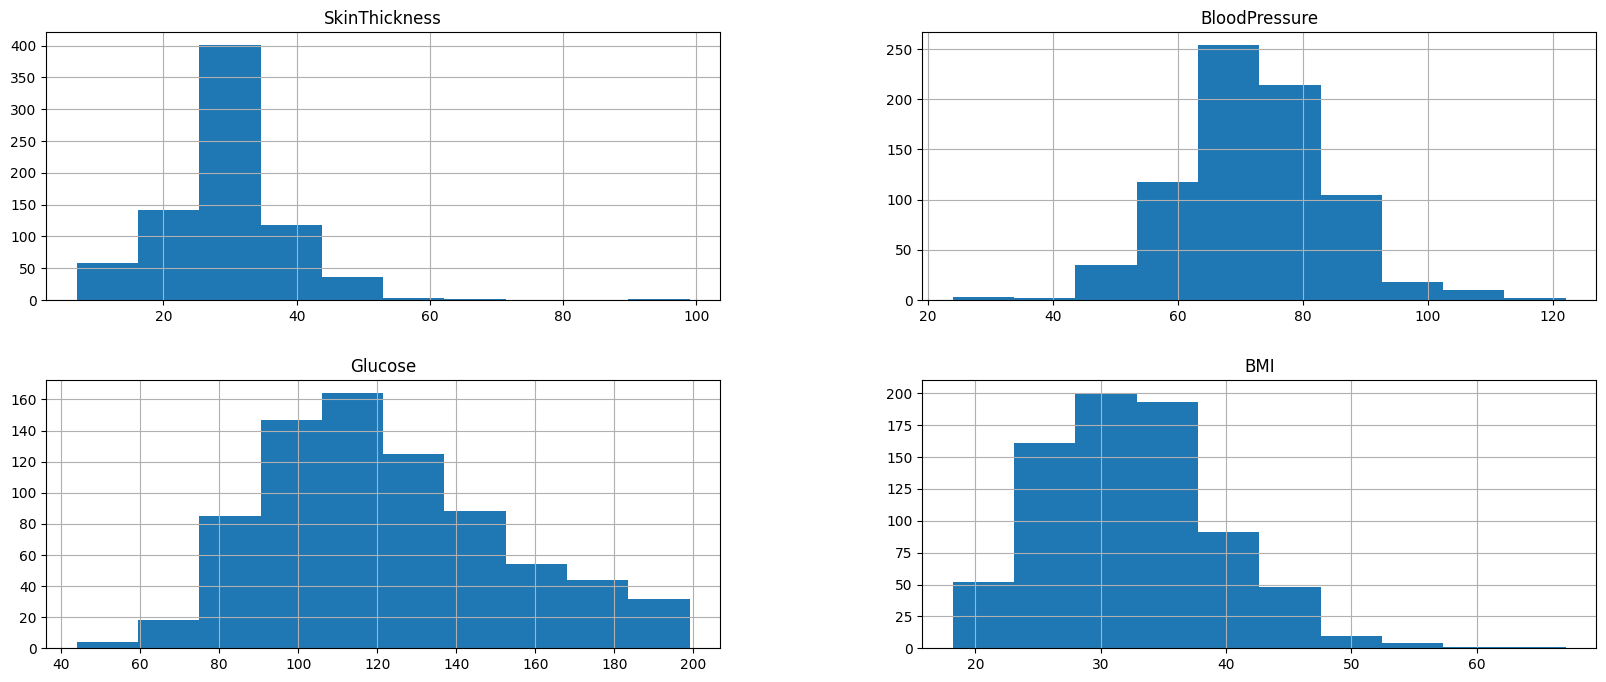

In [ ]:
cols = cols_with_null.index
df1[cols].hist(figsize=(20, 8));

In [205]:
# Вариант заполнения через fillna
print(pd.isnull(df3).sum())
print(round(df3['SkinThickness'].mean(), 1))
null_cols = {}
print(cols_with_null.index)
null_cols = dict.fromkeys(cols_with_null.index)
print(null_cols)
for col in cols_with_null.index:
    print(col)
    null_cols[col] = df3[col].median()
    
df3 = df3.fillna(null_cols)
print('='*20)
print(pd.isnull(df3).sum())
print(round(df3['SkinThickness'].mean(), 1))

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
29.2
Index(['SkinThickness', 'BloodPressure', 'Glucose', 'BMI'], dtype='object')
{'SkinThickness': None, 'BloodPressure': None, 'Glucose': None, 'BMI': None}
SkinThickness
BloodPressure
Glucose
BMI
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
29.1


## 8.7

In [ ]:
outliers, cleaned = outliers_iqr_mod(df1, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


## Задание 8.8

Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [ ]:
outliers, cleaned = outliers_z_score_mod(df1, 'SkinThickness')
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонений: 4
Результирующее число записей: 757


## Задание 8.9

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

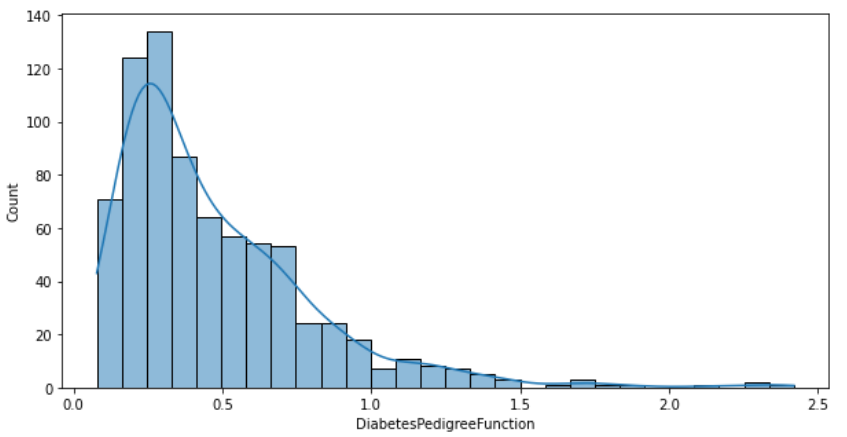

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [ ]:
outliers, cleaned = outliers_iqr_mod(df1, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [ ]:
outliers, cleaned = outliers_iqr_mod(df1, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


## ADDITIONAL 
Имеются две базы данных (два листа Excel-файла Data_TSUM.xlsx): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\\\, /.

Необходимо:

Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).